<a href="https://colab.research.google.com/github/Snaiyer1/MAT_421/blob/main/Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Derivatives

#### Single-Variable Derivatives

For a function $( f: D \to \mathbb{R} )$ (with $( D \subseteq \mathbb{R} )$) and an interior point $( x_0 \in D $), the derivative of $( f )$ at $( x_0 )$ is defined as:
$
f'(x_0) = \lim_{h \to 0} \frac{f(x_0+h) - f(x_0)}{h},
$
provided the limit exists.

- The derivative measures the sensitivity of the function value to small changes in \( x \).
- It can be interpreted as the slope of the tangent line to the curve at $( x_0)$.

For functions $( f )$ and $( g )$ that are differentiable at $( x )$ and for constants $( \alpha, \beta )$, we have:
$
\alpha f(x) + \beta g(x)]' = \alpha f'(x) + \beta g'(x).
$

Example:
Let $( f(x) = x^2 + 3x + 2 )$. We compute its derivative and plot the function along with the tangent line at a chosen point $( x_0 )$. For instance, when $( x_0 = -1 )$, we plot $( f(x) )$ and its tangent line at that point.


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x = sp.symbols('x')

f = x**2 + 3*x + 2
f_prime = sp.diff(f, x)

print("Single-Variable Example:")
print("Function f(x):", f)
print("Derivative f'(x):", f_prime)

Single-Variable Example:
Function f(x): x**2 + 3*x + 2
Derivative f'(x): 2*x + 3


#### Multivariable Derivatives

For a function $f: D \subseteq \mathbb{R}^d \to \mathbb{R}$ and an interior point $x_0$, the partial derivative with respect to $x_i$ is:
$$
\frac{\partial f(x_0)}{\partial x_i} = \lim_{h \to 0} \frac{f(x_0 + h\, e_i) - f(x_0)}{h},
$$
where $e_i$ is the $i$-th standard basis vector.

For a vector-valued function $f = (f_1, \dots, f_m): D \to \mathbb{R}^m$, the Jacobian at $x_0$ is the matrix of all first-order partial derivatives. For a scalar-valued function, the Jacobian reduces to the row vector of partial derivatives (i.e. the gradient).

Consider the function:
$$
h(x_1, x_2) = x_1^2 + 3x_1x_2 + x_2^2.
$$

We compute its partial derivatives and the Hessian matrix.

In [2]:
x1, x2 = sp.symbols('x1 x2')
h_expr = x1**2 + 3*x1*x2 + x2**2

h_x1 = sp.diff(h_expr, x1)
h_x2 = sp.diff(h_expr, x2)

print("Partial Derivatives for h(x1, x2):")
print("∂h/∂x1:", h_x1)
print("∂h/∂x2:", h_x2)

hessian_matrix = sp.hessian(h_expr, (x1, x2))
print("\nHessian Matrix for h(x1, x2):")
sp.pprint(hessian_matrix)

Partial Derivatives for h(x1, x2):
∂h/∂x1: 2*x1 + 3*x2
∂h/∂x2: 3*x1 + 2*x2

Hessian Matrix for h(x1, x2):
⎡2  3⎤
⎢    ⎥
⎣3  2⎦


#### Chain Rule and Directional Derivatives

For composite functions $h(x) = g(f(x))$, the derivative is given by:
$$
J_{g\circ f}(x_0) = J_g(f(x_0)) \, J_f(x_0).
$$

For a differentiable function $f$, the directional derivative at $x_0$ in the direction $v$ (a unit vector) is:
$$
\frac{\partial f(x_0)}{\partial v} = \lim_{h \to 0} \frac{f(x_0 + hv) - f(x_0)}{h} = \nabla f(x_0)^T v.
$$

Below is an example for the function $h(x_1,x_2)$ at the point $(1,1)$ in the direction
$$
v = \left(\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}}\right).
$$

In [5]:
# Evaluate the gradient of h_expr
grad_h = sp.Matrix([sp.diff(h_expr, x1), sp.diff(h_expr, x2)])
point = (1, 1)
grad_h_at_point = grad_h.subs({x1: point[0], x2: point[1]})

# Define the unit direction vector v = (1/sqrt(2), 1/sqrt(2))
v = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
directional_derivative = grad_h_at_point.dot(sp.Matrix(v))

print("Gradient of h at (1,1):")
sp.pprint(grad_h_at_point)
print("\nDirectional derivative of h at (1,1) in direction (1/√2, 1/√2):")
sp.pprint(directional_derivative)

Gradient of h at (1,1):
⎡5⎤
⎢ ⎥
⎣5⎦

Directional derivative of h at (1,1) in direction (1/√2, 1/√2):
7.07106781186547


#### Taylor’s Theorem

If $f$ has $m$ continuous derivatives on $[a, b]$, then
$$
f(b) = f(a) + (b-a) f'(a) + \frac{(b-a)^2}{2} f''(a) + \dots + \frac{(b-a)^{m-1}}{(m-1)!} f^{(m-1)}(a) + R_m,
$$
with a remainder term
$$
R_m = \frac{(b-a)^m}{m!} f^{(m)}\Big(a+\theta(b-a)\Big) \quad \text{for some } \theta \in (0,1).
$$

For $f: \mathbb{R}^d \to \mathbb{R}$ that is twice continuously differentiable, the second-order Taylor expansion about $x_0$ is:
$$
f(x) \approx f(x_0) + \nabla f(x_0)^T (x - x_0) + \frac{1}{2}(x - x_0)^T H_f(x_0) (x - x_0),
$$
where $H_f(x_0)$ is the Hessian matrix.

For the function $f(x)=x^2+3x+2$, we can compute the Taylor series expansion about $x=0$ up to the second order.


In [7]:
taylor_expansion = sp.series(f, x, 0, 3)
print("Taylor Expansion of f(x) around x=0:")
sp.pprint(taylor_expansion)

Taylor Expansion of f(x) around x=0:
 2          
x  + 3⋅x + 2


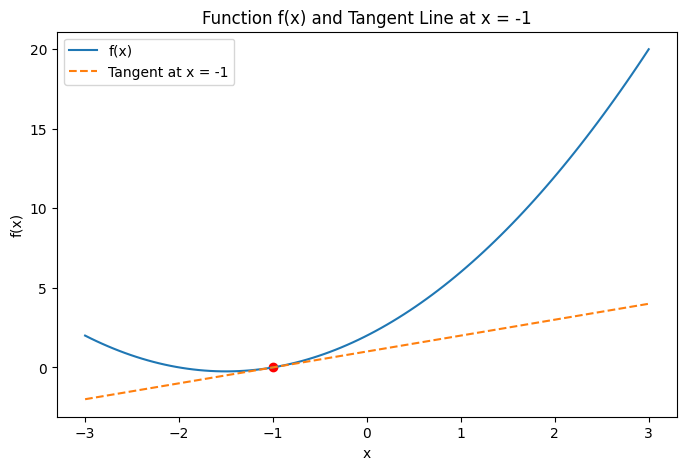

In [3]:
x0 = -1
tangent_slope = f_prime.subs(x, x0)
tangent_line = tangent_slope * (x - x0) + f.subs(x, x0)

x_vals = np.linspace(-3, 3, 100)
f_lambdified = sp.lambdify(x, f, 'numpy')
tangent_lambdified = sp.lambdify(x, tangent_line, 'numpy')

plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_lambdified(x_vals), label='f(x)')
plt.plot(x_vals, tangent_lambdified(x_vals), linestyle='dashed', label='Tangent at x = -1')
plt.scatter([x0], [f.subs(x, x0)], color='red')
plt.title("Function f(x) and Tangent Line at x = -1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

#### Unconstrained Optimization

**Local Minimizer:**  
A point $x^*$ is a local minimizer if there exists $\delta > 0$ such that:
$$
f(x) \geq f(x^*) \quad \forall x \in B_\delta(x^*).
$$

- **First-Order Necessary Condition:**  
  If $x^*$ is a local minimizer and $f$ is continuously differentiable, then
  $$
  \nabla f(x^*) = 0.
  $$

- **Second-Order Necessary Condition:**  
  If $f$ is twice differentiable and $x^*$ is a local minimizer, then the Hessian $H_f(x^*)$ is positive semi-definite.

For $f(x) = x^3$, we have $f'(0)=0$ and $f''(0)=0$, yet $x=0$ is not a minimizer.

A function $f: \mathbb{R}^d \to \mathbb{R}$ is convex if for any $x, y$ and $\alpha \in [0,1]$:
$$
f((1-\alpha)x + \alpha y) \leq (1-\alpha)f(x) + \alpha f(y).
$$

For convex functions:
- The first-order condition $f(y) \geq f(x) + \nabla f(x)^T (y-x)$ holds.
- Any local minimizer is automatically a global minimizer.

Example:
$f(x) = x^3$.

In [8]:
f_counter = x**3
f_counter_prime = sp.diff(f_counter, x)
f_counter_double = sp.diff(f_counter_prime, x)
print("For f(x) = x^3:")
print("f'(0) =", f_counter_prime.subs(x, 0))
print("f''(0) =", f_counter_double.subs(x, 0))
print("Note: Even though f'(0) = 0 and f''(0) = 0, x = 0 is not a local minimizer.")

For f(x) = x^3:
f'(0) = 0
f''(0) = 0
Note: Even though f'(0) = 0 and f''(0) = 0, x = 0 is not a local minimizer.



#### Mean Value Theorem and Rolle's Theorem

**Rolle’s Theorem:**  
If $f$ is continuous on $[a,b]$, differentiable on $(a,b)$, and $f(a)=f(b)$, then there exists $c \in (a,b)$ such that:
$$
f'(c)=0.
$$

**Mean Value Theorem (MVT):**  
If $f$ is continuous on $[a,b]$ and differentiable on $(a,b)$, then there exists $c \in (a,b)$ such that:
$$
f(b) - f(a) = (b-a) f'(c).
$$

Here is an example using the function $g(x) = x^3 - 3x + 2$ over the interval $[-2, 2]$.

In [4]:
# %% [code]
# Define function g(x) for the MVT example
g = x**3 - 3*x + 2
g_prime = sp.diff(g, x)
a_val, b_val = -2, 2
mvt_slope = (g.subs(x, b_val) - g.subs(x, a_val)) / (b_val - a_val)
c_candidates = sp.solve(g_prime - mvt_slope, x)

print("Mean Value Theorem Example:")
print("MVT slope (g(b)-g(a))/(b-a):", mvt_slope)
print("Candidate c values where g'(c) equals the MVT slope:", c_candidates)

Mean Value Theorem Example:
MVT slope (g(b)-g(a))/(b-a): 1
Candidate c values where g'(c) equals the MVT slope: [-2*sqrt(3)/3, 2*sqrt(3)/3]


#### Gradient Descent

Gradient descent is an iterative optimization method where we update the variable in the direction of the negative gradient.

1. Initialize $x_0$.
2. Repeat:
   $$
   x_{k+1} = x_k - \alpha_k \nabla f(x_k)
   $$
   until convergence.
3. The step size $\alpha_k$ can be chosen via a line search or fixed heuristics.
4. The negative gradient $-\nabla f(x_k)$ is the steepest descent direction.

Gradient descent iteratively updates the point $x$ in the direction of the negative gradient:
$$
x_{k+1} = x_k - \alpha_k \nabla f(x_k)
$$
where $\alpha_k$ is the step size.

Let's look at the function $f(x)=x^2+3x+2$.

Gradient Descent on f(x) = x^2 + 3x + 2:
Step 1: x = 1.2999999999999998, f(x) = 7.59000000000000
Step 2: x = 0.7399999999999999, f(x) = 4.76760000000000
Step 3: x = 0.2919999999999999, f(x) = 2.96126400000000
Step 4: x = -0.06640000000000007, f(x) = 1.80520896000000
Step 5: x = -0.3531200000000001, f(x) = 1.06533373440000
Step 6: x = -0.5824960000000001, f(x) = 0.591813590016000
Step 7: x = -0.7659968000000001, f(x) = 0.288760697610240
Step 8: x = -0.9127974400000001, f(x) = 0.0948068464705538
Step 9: x = -1.030237952, f(x) = -0.0293236182588457
Step 10: x = -1.1241903616, f(x) = -0.108767115685661


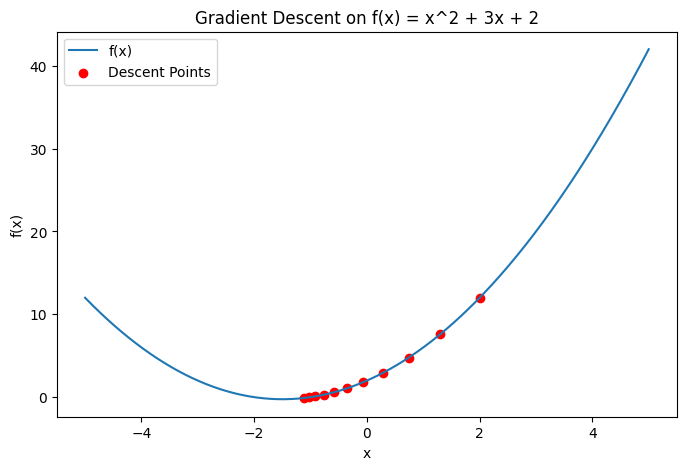

In [9]:
def gradient_descent(f_expr, var, initial=2, lr=0.1, steps=10):
    grad_expr = sp.diff(f_expr, var)
    x_val = initial
    trajectory = [x_val]
    for i in range(steps):
        grad_val = float(grad_expr.subs(var, x_val))
        x_val = x_val - lr * grad_val
        trajectory.append(x_val)
        print(f"Step {i+1}: x = {x_val}, f(x) = {f_expr.subs(var, x_val)}")
    return trajectory

print("Gradient Descent on f(x) = x^2 + 3x + 2:")
trajectory = gradient_descent(f, x, initial=2, lr=0.1, steps=10)

# Plot the descent trajectory
x_vals_plot = np.linspace(-5, 5, 400)
f_func = sp.lambdify(x, f, 'numpy')
plt.figure(figsize=(8, 5))
plt.plot(x_vals_plot, f_func(x_vals_plot), label="f(x)")
plt.scatter(trajectory, [f.subs(x, t) for t in trajectory], color='red', label="Descent Points")
plt.title("Gradient Descent on f(x) = x^2 + 3x + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()